In [1]:
from pylab import *
from scipy.special import *
from scipy.linalg import *
%matplotlib inline
eps = finfo(float).eps

###### Quadrature Rules

In [12]:
def gauss_legendre(n,a,b):
    k = arange(1.0,n)       
    a_band = zeros((2,n)) 
    a_band[1,0:n-1] = k/sqrt(4*k*k-1) 
    x,V = eig_banded(a_band,lower=True) 
    w = 2*real(V[0,:]**2) 
    # Translate interval as necessary
    x = a+0.5*(b-a)*(x+1)
    # Scale weights accordingly
    w = 0.5*(b-a)*w   
    return w,x

###### Change functions so that the input is (n,a,b) and weights and nodes are returned just as in the Gauss-Legendre function. Recall that the trapezoidal rule requires the dot product to be multiplied by 0.5*h while Simpson's rule requires multiplication by h/3. You can multiply the weights by these factors.

In [35]:
def mytrap(n,a,b):
    x = linspace(a,b,n)
    h = abs(x[-1]-x[0])/(len(x)-1)
    w = ones(x.size)*2
    w[0] = 1
    w[x.size-1] = 1
    w = 0.5*w*h
    return w,x

In [55]:
def mysimp(n,a,b):
    x = linspace(a,b,n)
    h = abs(x[-1]-x[0])/(len(x)-1)
    w = ones(x.size)
    w[1::2] = 4
    w[0::2] = 2
    w[0] = 1
    w[x.size-1] = 1

    w = (h/3)*w
    return w,x

## Run Experiments

In [67]:
def f(x,a,b):
    #return b**21-a**21, 21*x**20
    return erf(b),(2/sqrt(pi))*exp(-x**2)
    #return arctan(b)-arctan(a),sqrt(1-x**2)
    #return fresnel(b)[0],sin(pi*x**2/2)

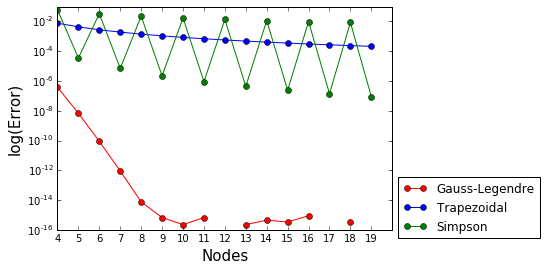

In [68]:
#nvec = 2**arange(4,10)
nvec = arange(4,20)
egq = zeros(nvec.size)
etp = zeros(nvec.size)
ets = zeros(nvec.size)
p = 0
# Erf and Fresnel examples expect intervals in the form [0, b]
a = 0
b = 1
for n in nvec:
    # Gaussian Quadrature
    w,x = gauss_legendre(n,a,b)
    xct,fx = f(x,a,b)
    egq[p] = abs(xct-dot(w,fx))
    # Trapezoidal
    w,x = mytrap(n,a,b)
    xct,fx = f(x,a,b)
    etp[p] = abs(xct-dot(w,fx))
    # Simpsons
    w,x = mysimp(n,a,b)
    xct,fx = f(x,a,b)
    ets[p] = abs(xct-dot(w,fx))
    # Increment
    p += 1
semilogy(nvec,egq,'ro-',nvec,etp,'bo-',nvec,ets,'go-')
xticks(nvec,nvec)
xlabel('Nodes',fontsize=15)
ylabel('log(Error)',fontsize=15)
legend(['Gauss-Legendre','Trapezoidal','Simpson'],loc='center left',bbox_to_anchor=(1.0, 0.1));